# About Dataset:
Context
The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence)

Content
This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

 - Age: Patients Age in years 
 - Sex: Gender (Male ; Female ) 
 - cp: Type of chest pain experienced by patient. This term categorized into 4 category.
    typical angina,  atypical angina,  non- anginal pain,  asymptomatic (Nominal)
 - trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
 - chol: Serum cholesterol in mg/dl 
 - fbs: Blood sugar levels on fasting > 120 mg/dl represents of true and false 
 - restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
     Normal  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
    0.05 mV)  showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
 - thalach: Maximum heart rate achieved (Numeric)
 - exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
 - oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
 - slope: ST segment measured in terms of slope during peak exercise
     up sloping;  flat;  down sloping(Nominal)
 - ca: The number of major vessels (0–3)(nominal)
 - thal: A blood disorder called thalassemia
     NULL,  normal blood flow,  fixed defect (no blood flow in some part of the heart), reversible defect (a blood flow is observed but it is not normal(nominal)
 - target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

Importing basic importent libreries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_excel("C:/Users/hp/Desktop/assignments/Decision Tree/heart_disease.xlsx")

In [3]:
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# Data Exploretion:

Let's explore Basic Statics For Numerical features:

In [4]:
raw_data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
raw_data.shape

(908, 13)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# Improper Data:

In [7]:
raw_data["exang"].unique() # Checking  for improper data 

array([False, True, 'FALSE', 'TURE'], dtype=object)

Observations: As we Observed I have to convert capital letters to small
    - let's convert this by using 

In [8]:
replace_dict = {
    True: 'true',
    False: 'false'
}
raw_data['exang'] = raw_data['exang'].replace(replace_dict)
raw_data['exang'] = raw_data['exang'].apply(lambda x: x.lower() if isinstance(x, str) else x)

raw_data["exang"] = np.where(raw_data["exang"].values == "ture", "true", raw_data["exang"])

In [9]:
raw_data["exang"].value_counts()

false    535
true     373
Name: exang, dtype: int64

Now it's cleand and looks like perfect

# Missing Values:

Checking for null values:

In [10]:
raw_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Text(0.5, 1.0, 'Checking for null values')

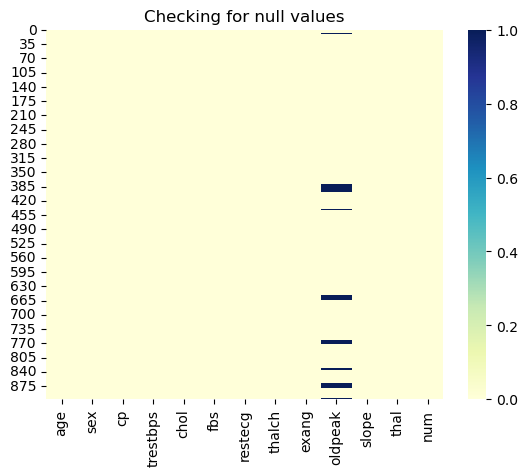

In [11]:
sns.heatmap(data=raw_data.isnull(),cmap="YlGnBu")
plt.title("Checking for null values")

In [12]:
 raw_data["oldpeak"].median()

0.5

In [13]:
data = raw_data.copy()
raw_data["oldpeak"]=raw_data["oldpeak"].fillna(raw_data["oldpeak"].median())

In [14]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Cross Checking for null values

Text(0.5, 1.0, 'After imputing median with Null Values')

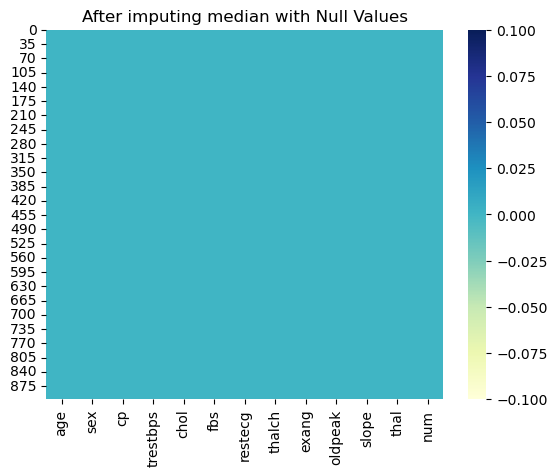

In [15]:
sns.heatmap(data=raw_data.isnull(),cmap="YlGnBu")
plt.title("After imputing median with Null Values")

Observation:There is no Null Values Found

In [16]:
num_features = raw_data.select_dtypes(include=['int64', 'float64']).columns # spliting numerical data features
for i in raw_data[num_features]:
    print ("---- %s ---" % i)
    print (raw_data[i].value_counts())

---- age ---
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: age, dtype: int64
---- trestbps ---
120    128
130    114
140    100
110     58
150     55
      ... 
163      1
107      1
174      1
185      1
182      1
Name: trestbps, Length: 85, dtype: int64
---- chol ---
0      172
230      9
211      9
223      9
219      9
      ... 
165      1
161      1
139      1
385      1
109      1
Name: chol, Length: 228, dtype: int64
---- thalch ---
140    42
150    41
120    36
130    30
160    25
       ..
190     1
91      1
185     1
195     1
69      1
Name: thalch, Length: 122, dtype: int64
---

In [17]:
cat_fea = raw_data.select_dtypes(include=['object']).columns # spliting categorical features
for i in raw_data[cat_fea]:
    print ("---- %s ---" % i)
    print (raw_data[i].value_counts())

---- sex ---
Male      718
Female    190
Name: sex, dtype: int64
---- cp ---
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64
---- restecg ---
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: restecg, dtype: int64
---- exang ---
false    535
true     373
Name: exang, dtype: int64
---- slope ---
flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64
---- thal ---
reversable defect    349
normal               345
fixed defect         214
Name: thal, dtype: int64


# Data Visualization:

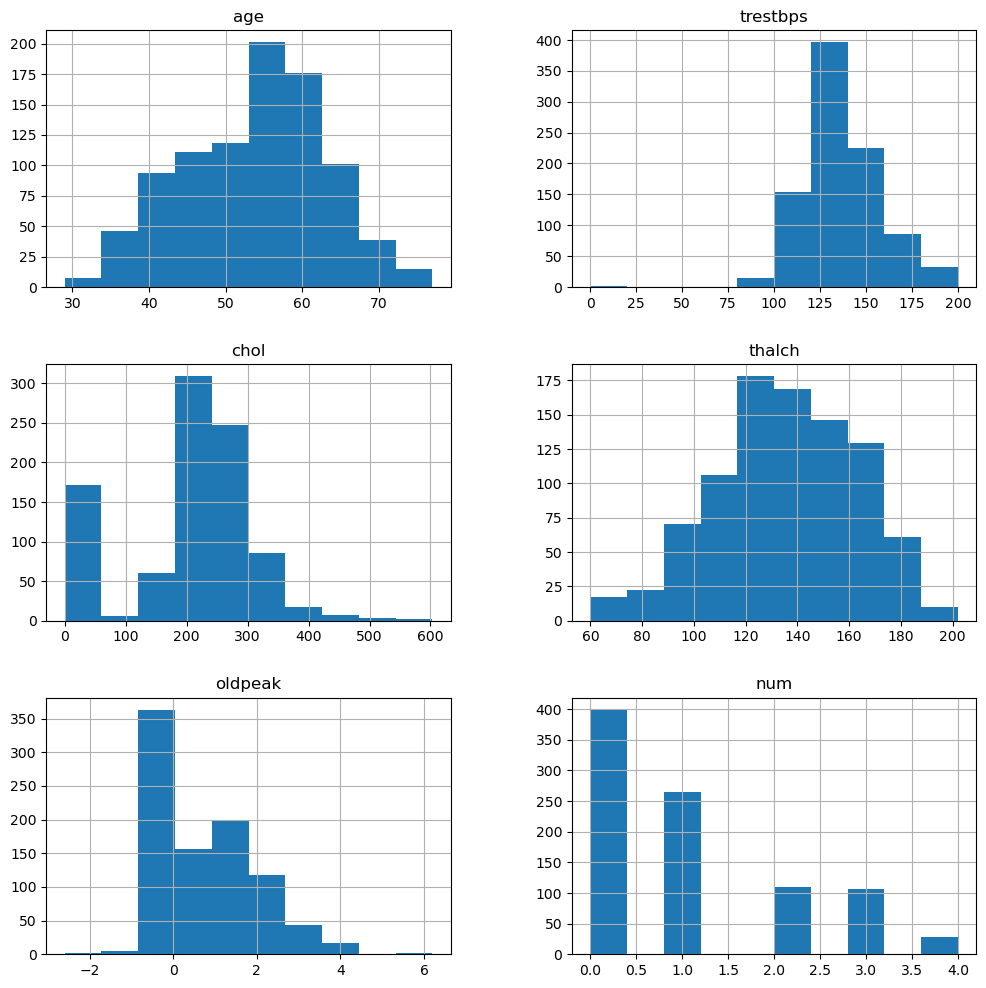

In [18]:
raw_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Outliers Visualization:

In [19]:
def box_plot(df):
    # Create box plots for numerical variables
    fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, df.shape[1] * 2))
    axes = axes.flatten()
    for ax, col in zip(axes, df.columns):
        sns.boxplot(x=df[col], ax=ax, palette="crest")
        ax.set_xlabel(col)
        ax.set_ylabel("Range")

    plt.tight_layout()
    plt.show()

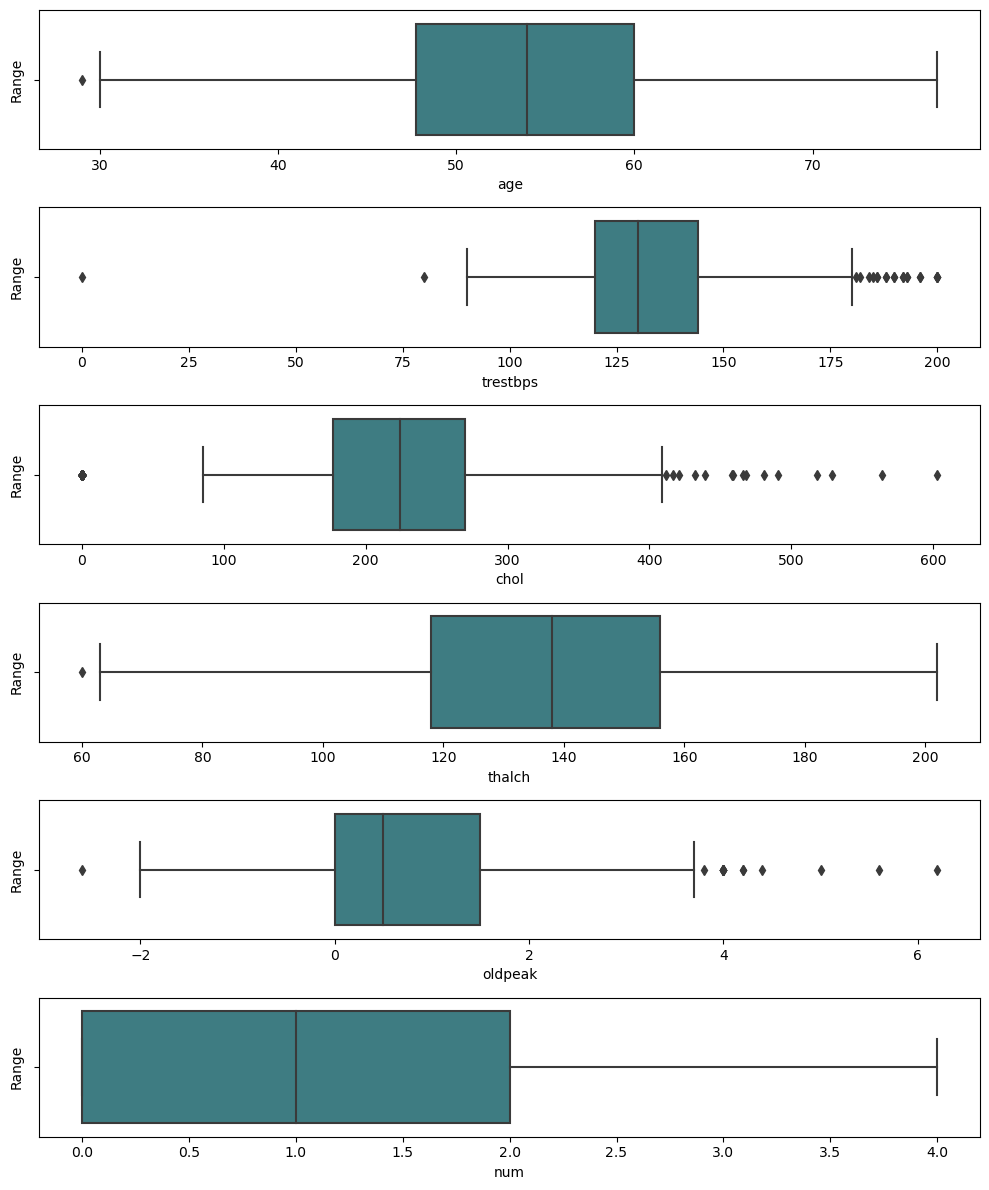

In [20]:
box_plot(raw_data[num_features])

Observation: As we see there are few outliers Observed

        Count       %
Male      718  79.07%
Female    190  20.93%


Text(0.5, 1.0, 'Gender distribution')

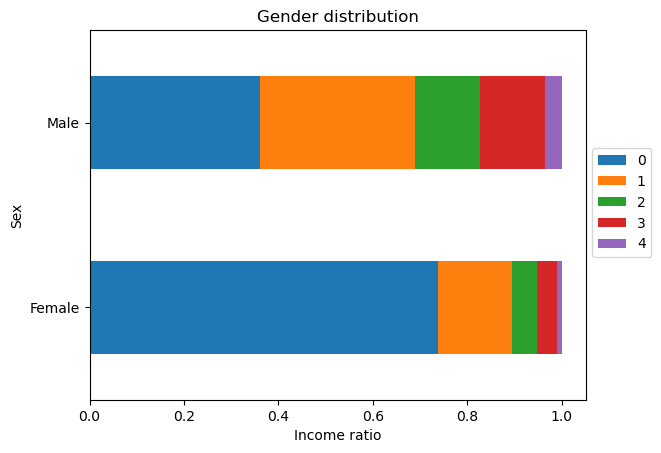

In [21]:
t=raw_data.sex
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['sex', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend( bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

                 Count       %
asymptomatic       495  54.52%
non-anginal        203  22.36%
atypical angina    165  18.17%
typical angina      45   4.96%


Text(0.5, 1.0, 'chest pain distribution')

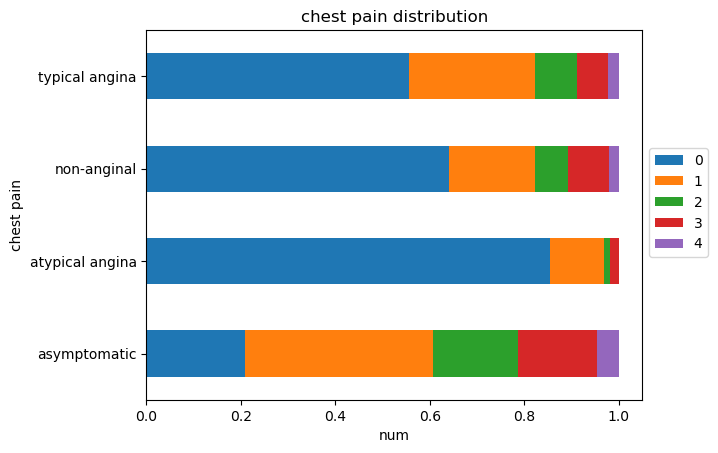

In [22]:
t=raw_data.cp
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['cp', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('chest pain')
plt.xlabel('num')
plt.title("chest pain distribution")

                  Count       %
normal              542  59.69%
lv hypertrophy      187  20.59%
st-t abnormality    179  19.71%


Text(0.5, 1.0, 'restecg distribution')

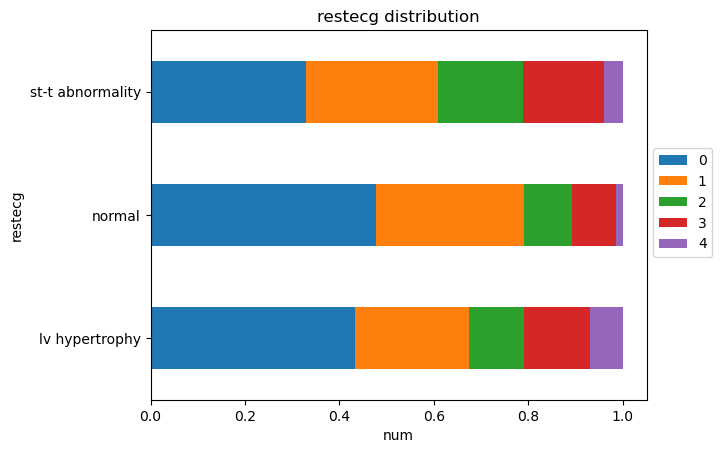

In [23]:
t=raw_data.restecg
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['restecg', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('restecg')
plt.xlabel('num')
plt.title("restecg distribution")

       Count       %
false    535  58.92%
true     373  41.08%


Text(0.5, 1.0, 'exang distribution')

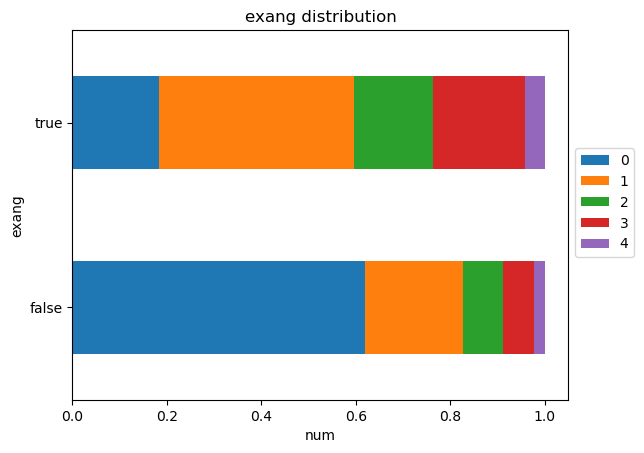

In [24]:
t=raw_data.exang
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['exang', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('exang')
plt.xlabel('num')
plt.title("exang distribution")

             Count       %
flat           453  49.89%
upsloping      298  32.82%
downsloping    157  17.29%


Text(0.5, 1.0, 'slope distribution')

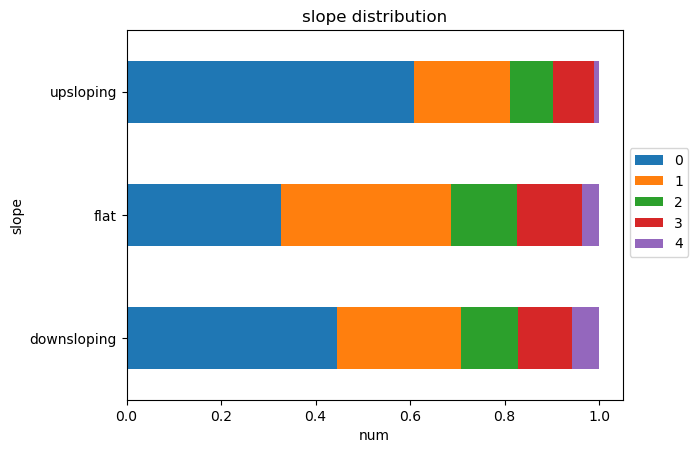

In [25]:
t=raw_data.slope
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['slope', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('slope')
plt.xlabel('num')
plt.title("slope distribution")

#  Encoding Techniques:

#### LabelEncoding:

let's apply label Encoding function For categorical Features: 

In [26]:
cat_fea # categorical Features

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
raw_data["cp"]=le.fit_transform(raw_data["cp"])
raw_data["restecg"]=le.fit_transform(raw_data["restecg"])
raw_data["exang"]=le.fit_transform(raw_data["exang"])
raw_data["slope"]=le.fit_transform(raw_data["slope"])
raw_data["thal"]=le.fit_transform(raw_data["thal"])
raw_data["sex"]=le.fit_transform(raw_data["sex"])
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


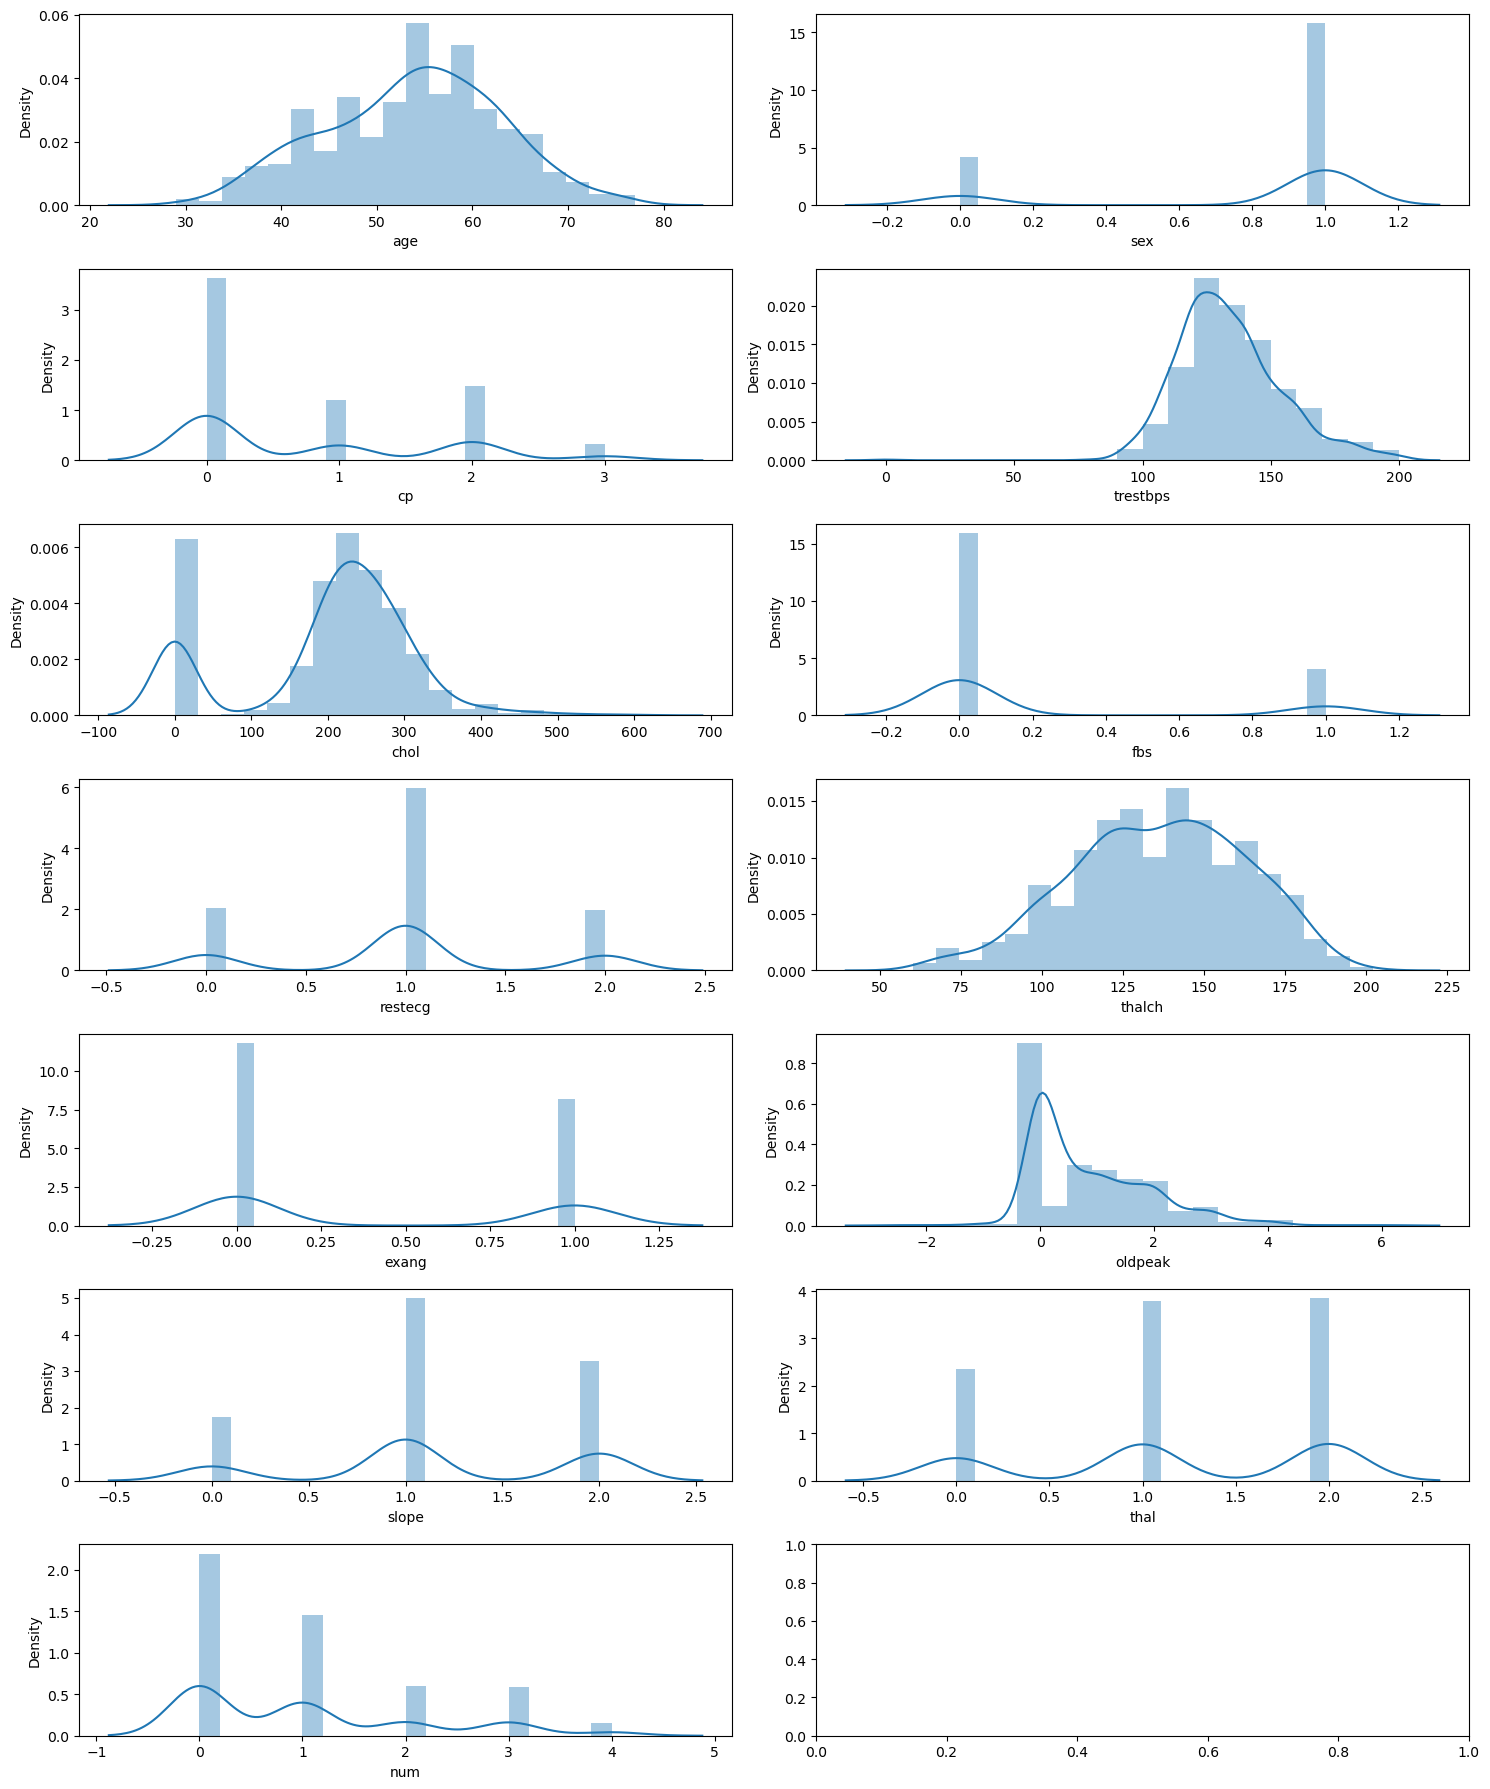

In [28]:
fig, axes = plt.subplots(7,2, figsize=(15,18))  # 5 rows, 2 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, raw_data.columns):
    sns.distplot(raw_data[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

# Outliers:

Let's check for outliers:

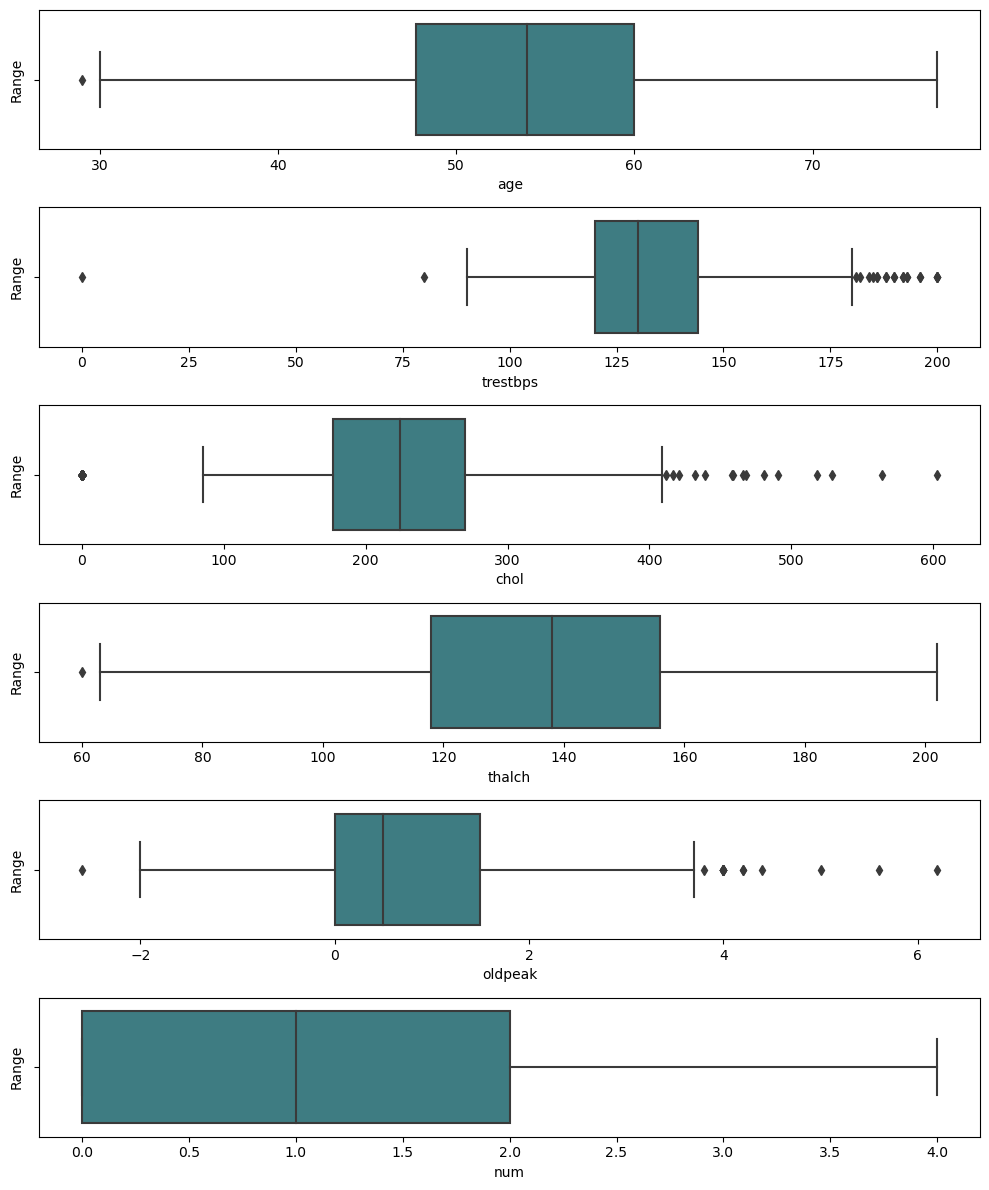

In [29]:
box_plot(raw_data[num_features])

In [30]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.25, random_state=42)
outliers = iso_forest.fit_predict(raw_data[num_features])

In [31]:
# -1 indicates an outlier, 1 indicates an inlier
raw_data['outlier'] = outliers
raw_data["outlier"].value_counts()

 1    681
-1    227
Name: outlier, dtype: int64

Observation: As We See I Have 91 Outliers Found:

 - I Have To Remove This 

In [32]:
# Remove outliers
cleaned_data = raw_data[raw_data['outlier'] == 1].drop(columns=['outlier'])

print(cleaned_data)

     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233   True        0     150      0      2.3   
1     41    1   1       135   203  False        1     132      0      0.0   
2     57    1   0       140   192  False        1     148      0      0.4   
3     52    1   3       118   186  False        0     190      0      0.0   
4     57    1   0       110   201  False        1     126      1      1.5   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...      ...   
854   67    1   3       142   270   True        1     125      0      2.5   
857   58    1   0       160   256   True        0     113      1      1.0   
864   65    1   0       150   236   True        2     105      1      0.0   
865   63    1   2       130     0  False        2     111      1      0.0   
867   69    1   0       140   208  False        2     140      1      2.0   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2  

After Removing Outliers By Using `Isolation` Techniques:

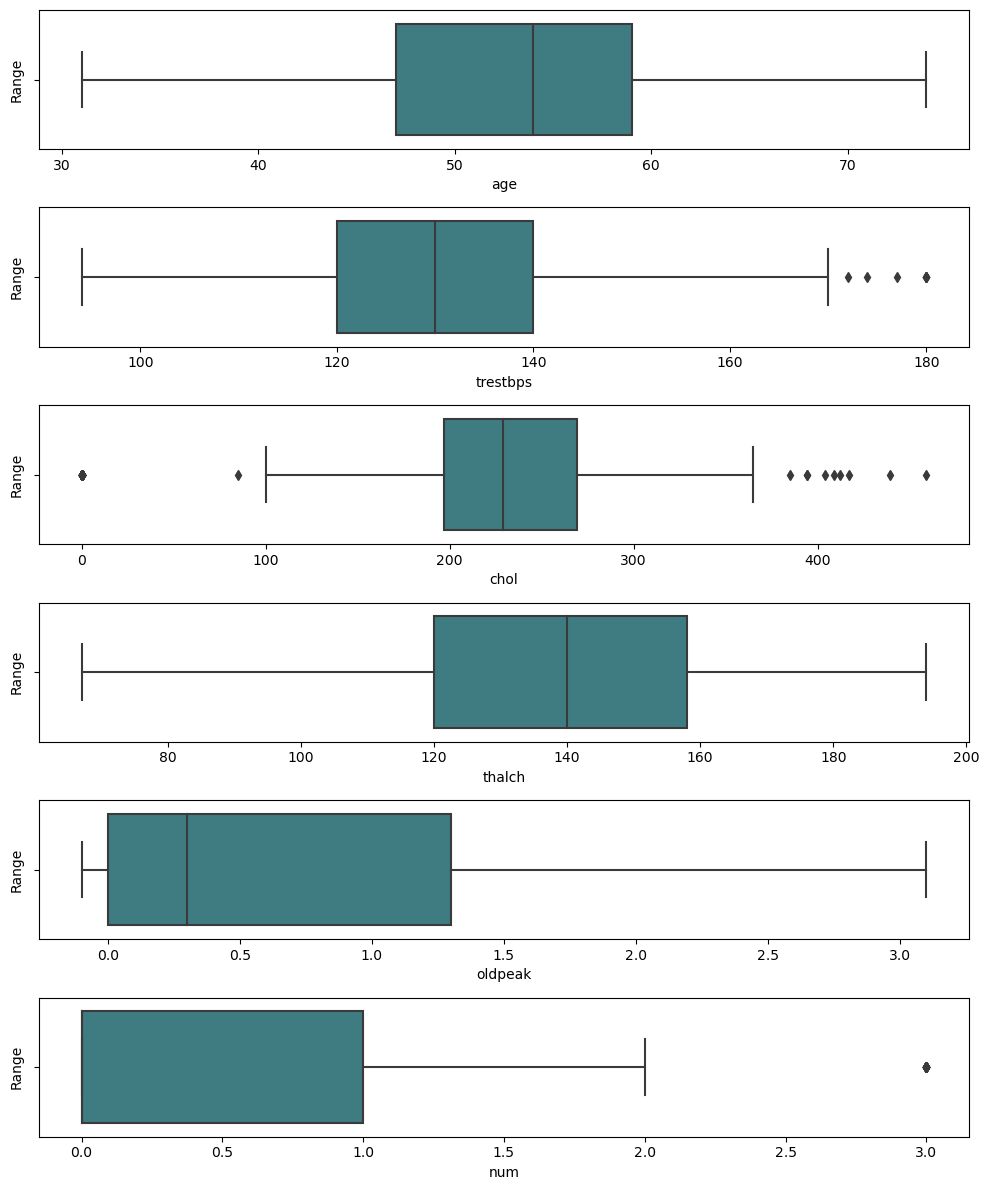

In [33]:
box_plot(cleaned_data[num_features])

Observation: As we see ouliers are reduced

In [34]:
data_scores = cleaned_data.copy()# data values scores based on isolation forest decision function in scale of 0 to 1
data_scores["scores"] = iso_forest.decision_function(cleaned_data[num_features])
data_scores

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,scores
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0,0.039748
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0,0.089863
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0,0.091447
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0,0.032459
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0,0.048179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,67,1,3,142,270,True,1,125,0,2.5,2,2,3,0.012204
857,58,1,0,160,256,True,0,113,1,1.0,2,0,3,0.019119
864,65,1,0,150,236,True,2,105,1,0.0,1,0,3,0.015074
865,63,1,2,130,0,False,2,111,1,0.0,1,0,3,0.016794


# Features  Scaling:

Let's apply `standard Scaler`:

In [35]:
from sklearn.preprocessing import StandardScaler
data = cleaned_data
scaler = StandardScaler()
std_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

Let's visualize standard Scaler for Numerical Features:

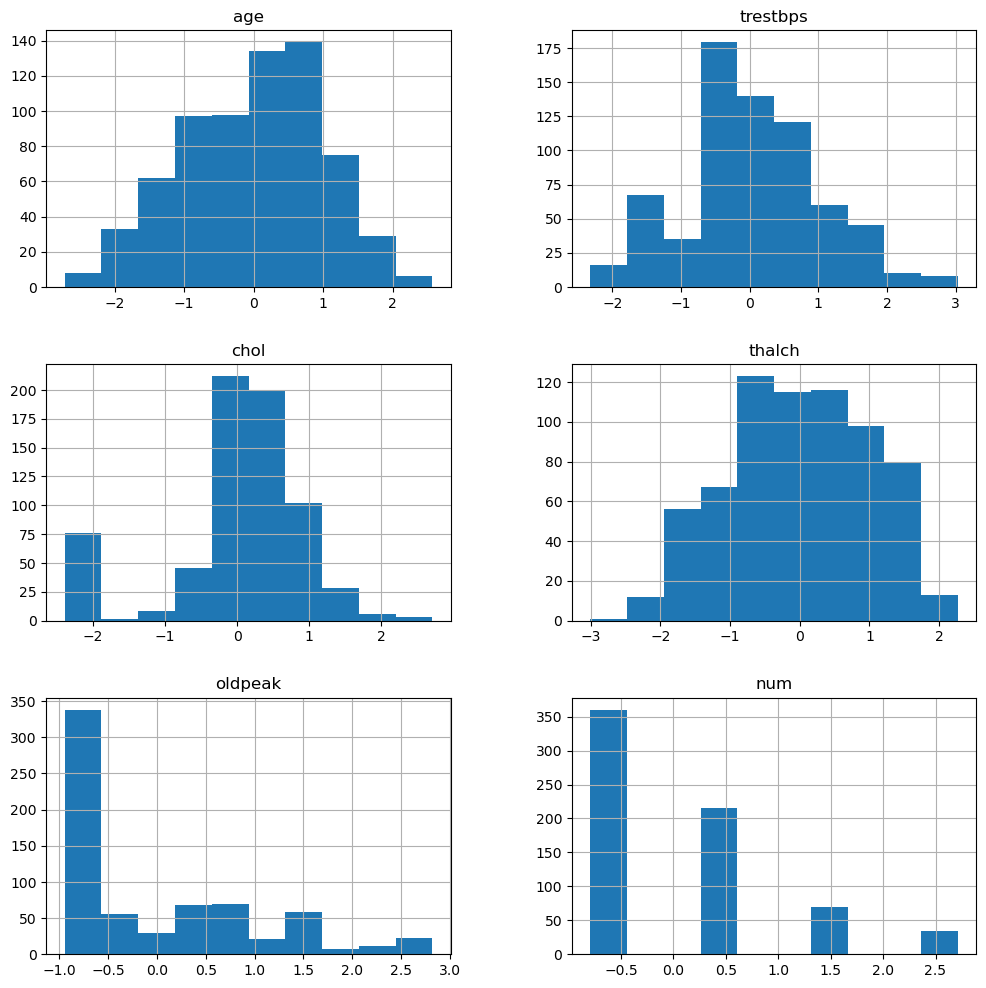

In [36]:
std_scaled_num_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Let's apply `MInMax` Scaler :

In [37]:
from sklearn.preprocessing import MinMaxScaler
data = cleaned_data
scaler = MinMaxScaler()
mimx_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

Let's visualize MInMax Scaler for Numerical features:

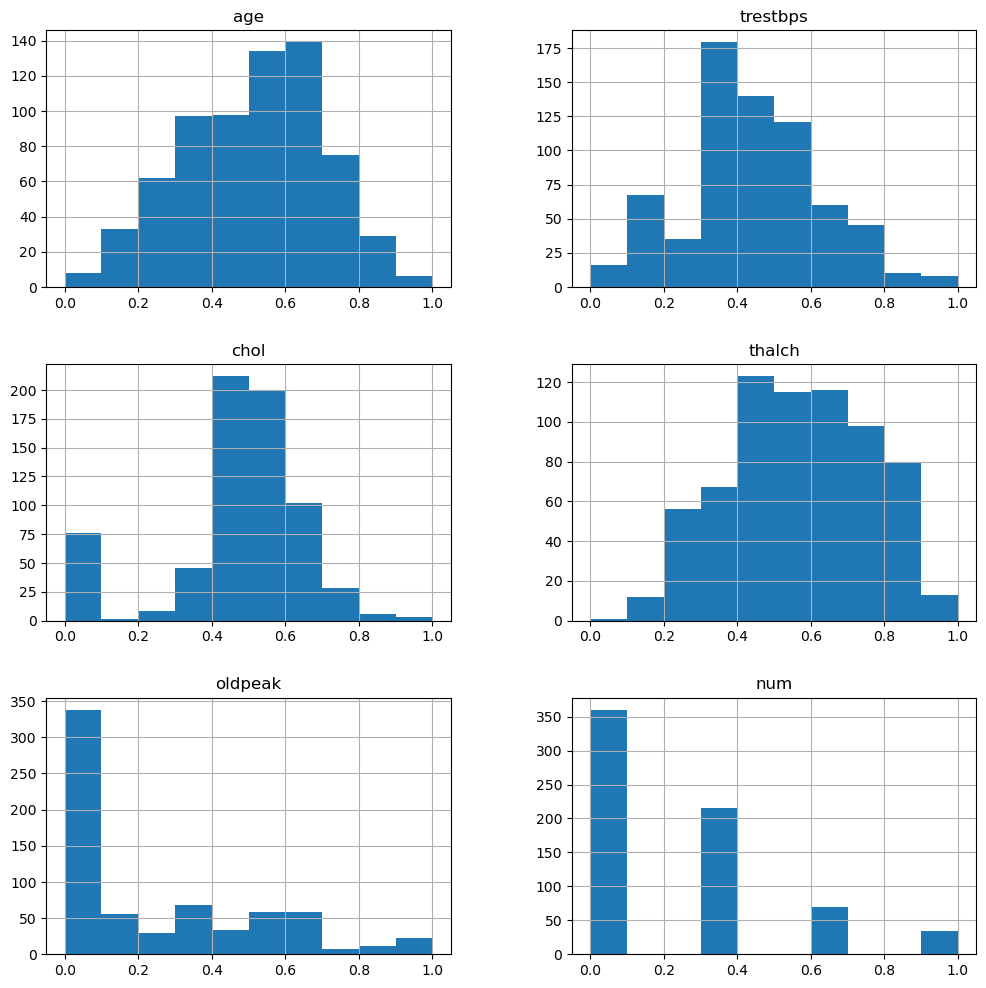

In [38]:
mimx_scaled_num_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Let's apply `log Transformation`

In [39]:
# Add a small constant to avoid log(0)
log_tfm_data = np.log1p(cleaned_data)  # np.log1p is equivalent to np.log(1 + x)
#log_tfm_data

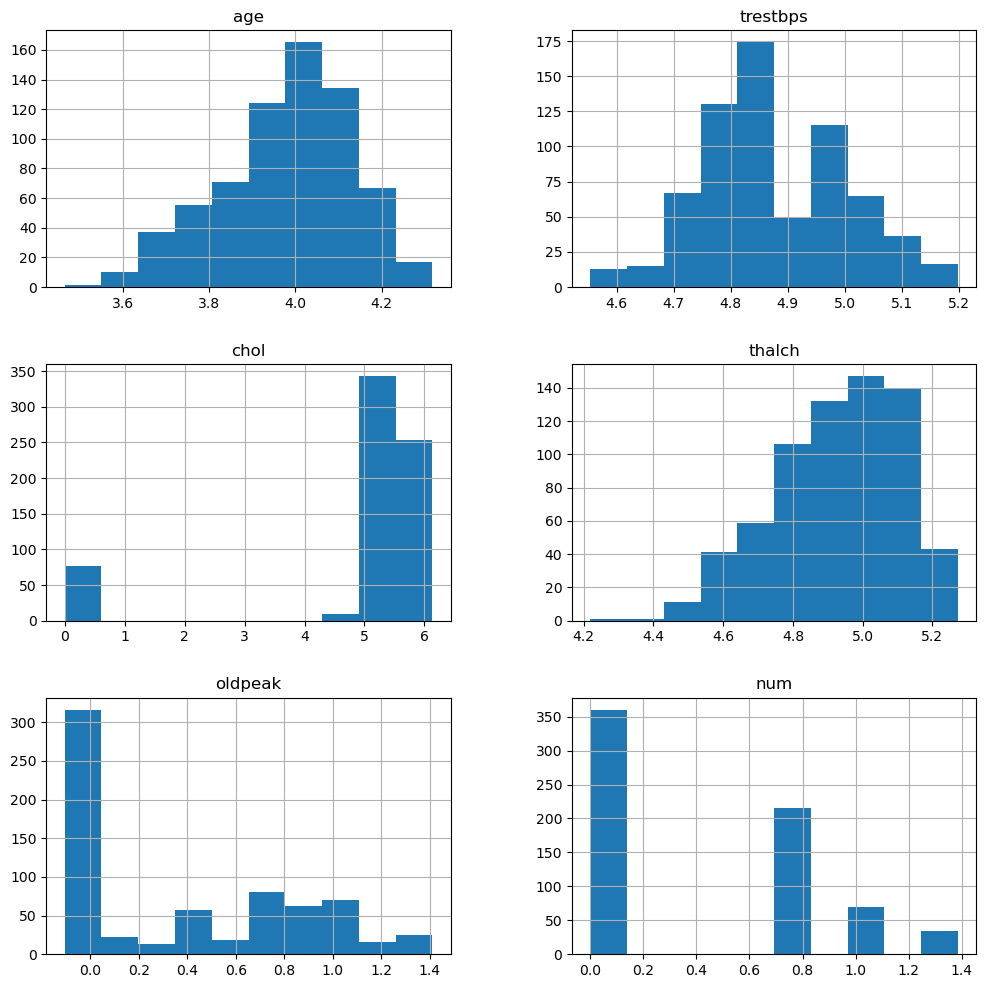

In [40]:
log_tfm_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

Let's visualize `pairplot` correlation between features to target 

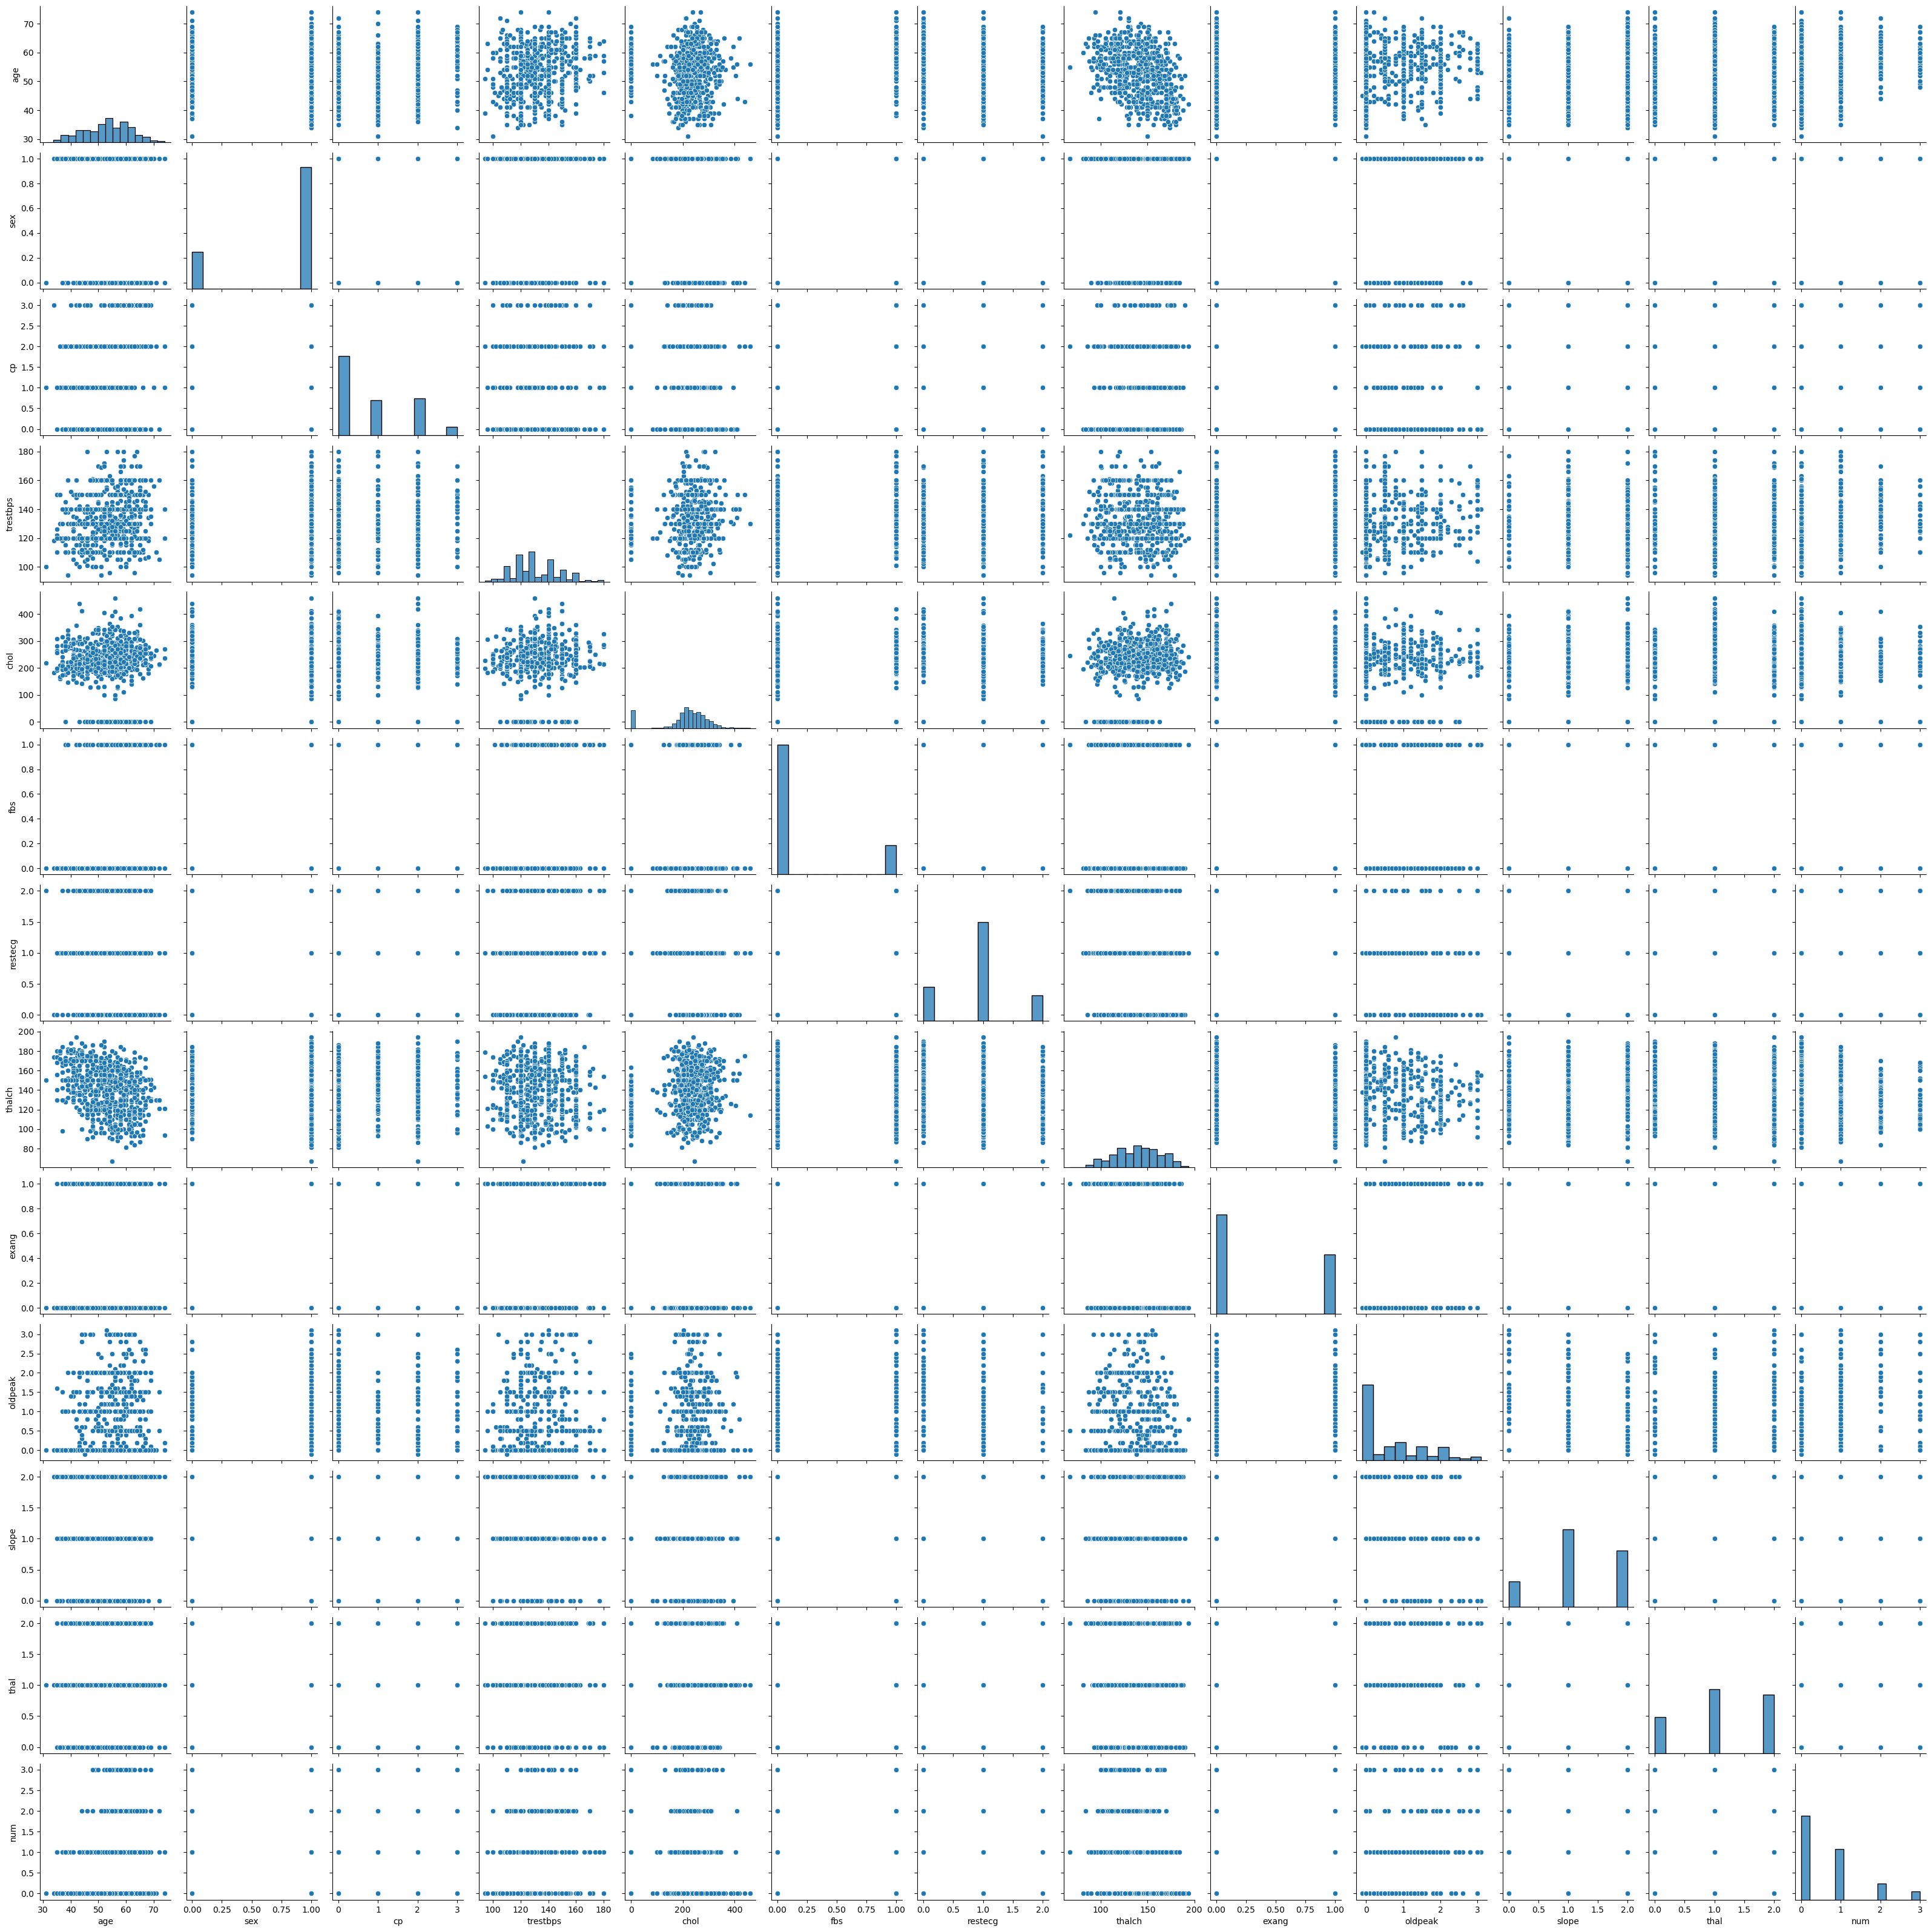

In [41]:
sns.pairplot(cleaned_data)

visualize `Heatmap`

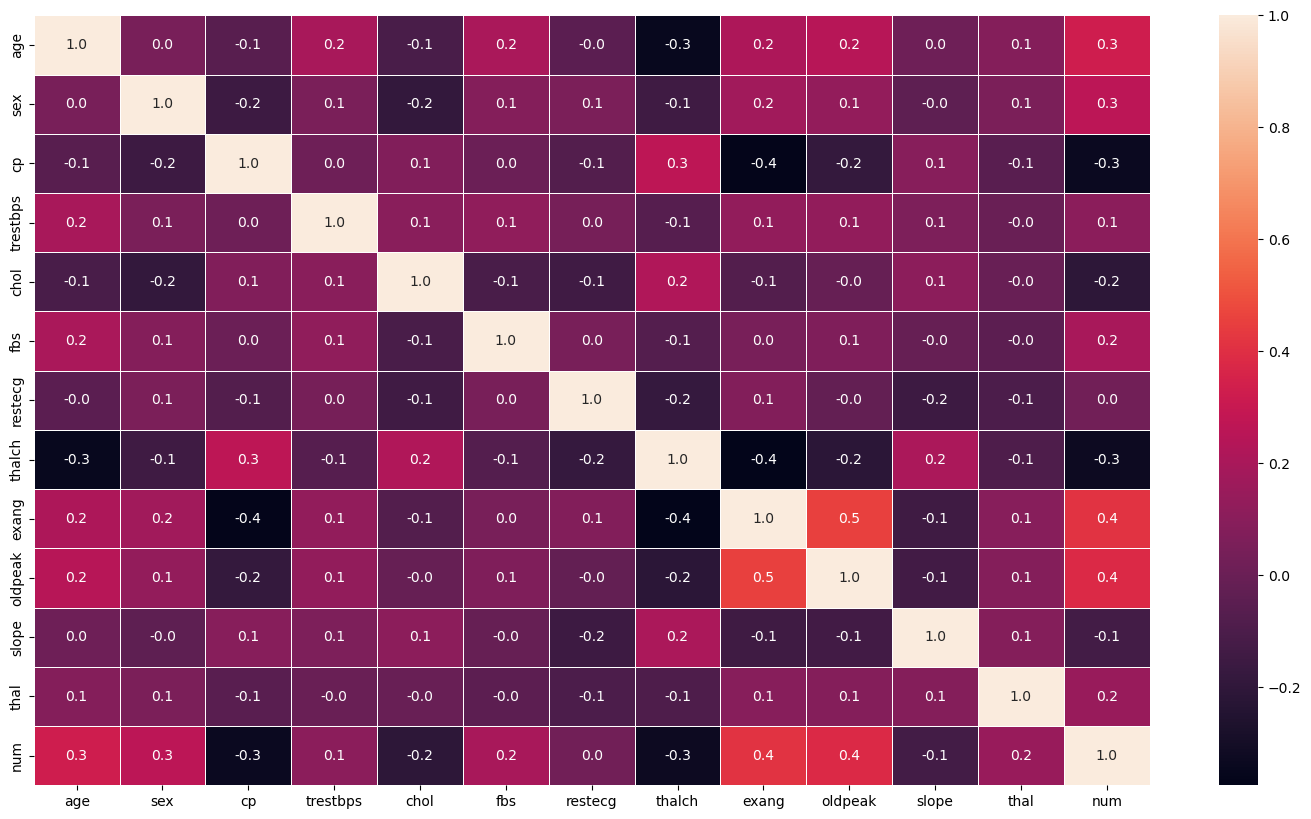

In [42]:
f,ax = plt.subplots(figsize=(18,10))
sns.heatmap(cleaned_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Let's calculate pps matrix

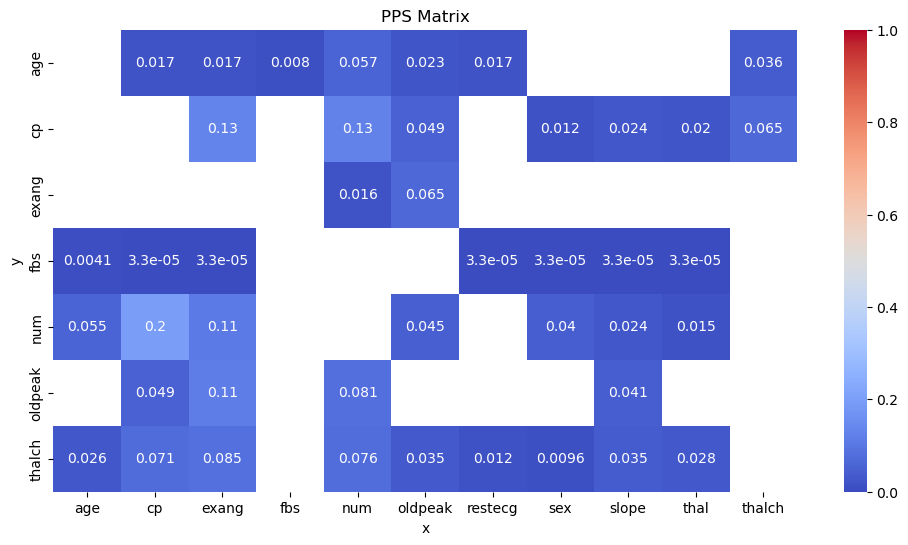

In [43]:
import ppscore as pps
# Calculate PPS matrix
pps_matrix = pps.matrix(cleaned_data)

# Display PPS matrix
pps_matrix_filtered = pps_matrix[(pps_matrix['ppscore'] > 0.0) & (pps_matrix['x'] != pps_matrix['y'])]
pps_matrix_pivot = pps_matrix_filtered.pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(12, 6))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')
plt.show()

# Decision Tree Classification:

Data Splite:

Let's Splite The Data into Train and test 80% - 20% 

In [44]:
from sklearn.model_selection import train_test_split
X = log_tfm_data.drop(columns=["num"])
y =cleaned_data["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
567,3.850148,0.693147,0.000000,4.709530,5.468060,0.0,0.693147,4.836282,0.693147,1.098612,0.693147,0.693147
249,3.891820,0.000000,0.000000,4.795791,5.541264,0.0,1.098612,4.709530,0.000000,0.000000,0.000000,0.000000
21,4.174387,0.000000,0.000000,4.875197,5.717028,0.0,0.693147,4.812184,0.000000,1.098612,0.693147,0.693147
551,4.007333,0.000000,0.000000,4.934474,5.616771,0.0,0.693147,4.663439,0.693147,0.916291,0.693147,1.098612
278,4.110874,0.693147,1.098612,4.795791,5.509388,0.0,0.000000,4.912655,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
76,3.970292,0.693147,0.693147,4.905275,5.308268,0.0,0.693147,5.068904,0.000000,0.587787,1.098612,0.693147
112,3.663562,0.693147,1.098612,4.934474,5.170484,0.0,0.693147,5.159055,0.000000,0.000000,1.098612,0.693147
299,3.637586,0.000000,1.098612,4.875197,5.356586,0.0,0.693147,4.962845,0.000000,0.000000,1.098612,0.000000
489,3.931826,0.693147,0.000000,4.976734,5.857933,0.0,0.000000,4.795791,0.693147,0.693147,1.098612,1.098612


Implement a Decision Tree Classification model using a library like scikit-learn

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dtc.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[65 17  5  0]
 [ 6 13  4  3]
 [ 6  5  5  0]
 [ 2  4  1  1]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        87
           1       0.33      0.50      0.40        26
           2       0.33      0.31      0.32        16
           3       0.25      0.12      0.17         8

    accuracy                           0.61       137
   macro avg       0.43      0.42      0.42       137
weighted avg       0.64      0.61      0.62       137



In [50]:
dtc.feature_importances_

array([0.13454372, 0.04045012, 0.14383253, 0.11296784, 0.11819991,
       0.00961862, 0.04933341, 0.17642958, 0.04742841, 0.11687874,
       0.02142792, 0.0288892 ])

In [51]:
features_imp_scores = pd.DataFrame(dtc.feature_importances_, index= X.columns)
features_imp_scores[0].sort_values(ascending=False)

thalch      0.176430
cp          0.143833
age         0.134544
chol        0.118200
oldpeak     0.116879
trestbps    0.112968
restecg     0.049333
exang       0.047428
sex         0.040450
thal        0.028889
slope       0.021428
fbs         0.009619
Name: 0, dtype: float64

# Hyperparameter Tuning:


### Improving Model Performance:
#### Using `SMOTH`:
 - Classifiers trained on imbalanced datasets tend to be biased towards the majority class. By balancing the classes, SMOTE helps in improving the classifier’s performance, especially in terms of recall and F1-score for the minority class.
 - Preventing Overfitting:

    Unlike simple oversampling, which duplicates minority class samples, SMOTE creates new synthetic samples, which helps in preventing overfitting.
 - Enhancing Generalization:

    By providing a more balanced dataset, SMOTE helps the model generalize better to new, unseen data.

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


X = log_tfm_data.drop(columns=["num"])
y =cleaned_data["num"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy={1: 273, 2: 273, 3: 273})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model and reduced parameter grid
clf = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_clf = random_search.best_estimator_

# Model Evaluation and Analysis:

In [55]:
# Predict and evaluate on the test set
y_pred = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70 15  1  1]
 [ 6 14  2  4]
 [ 4 10  2  0]
 [ 2  6  0  0]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        87
           1       0.31      0.54      0.39        26
           2       0.40      0.12      0.19        16
           3       0.00      0.00      0.00         8

    accuracy                           0.63       137
   macro avg       0.39      0.37      0.35       137
weighted avg       0.65      0.63      0.62       137



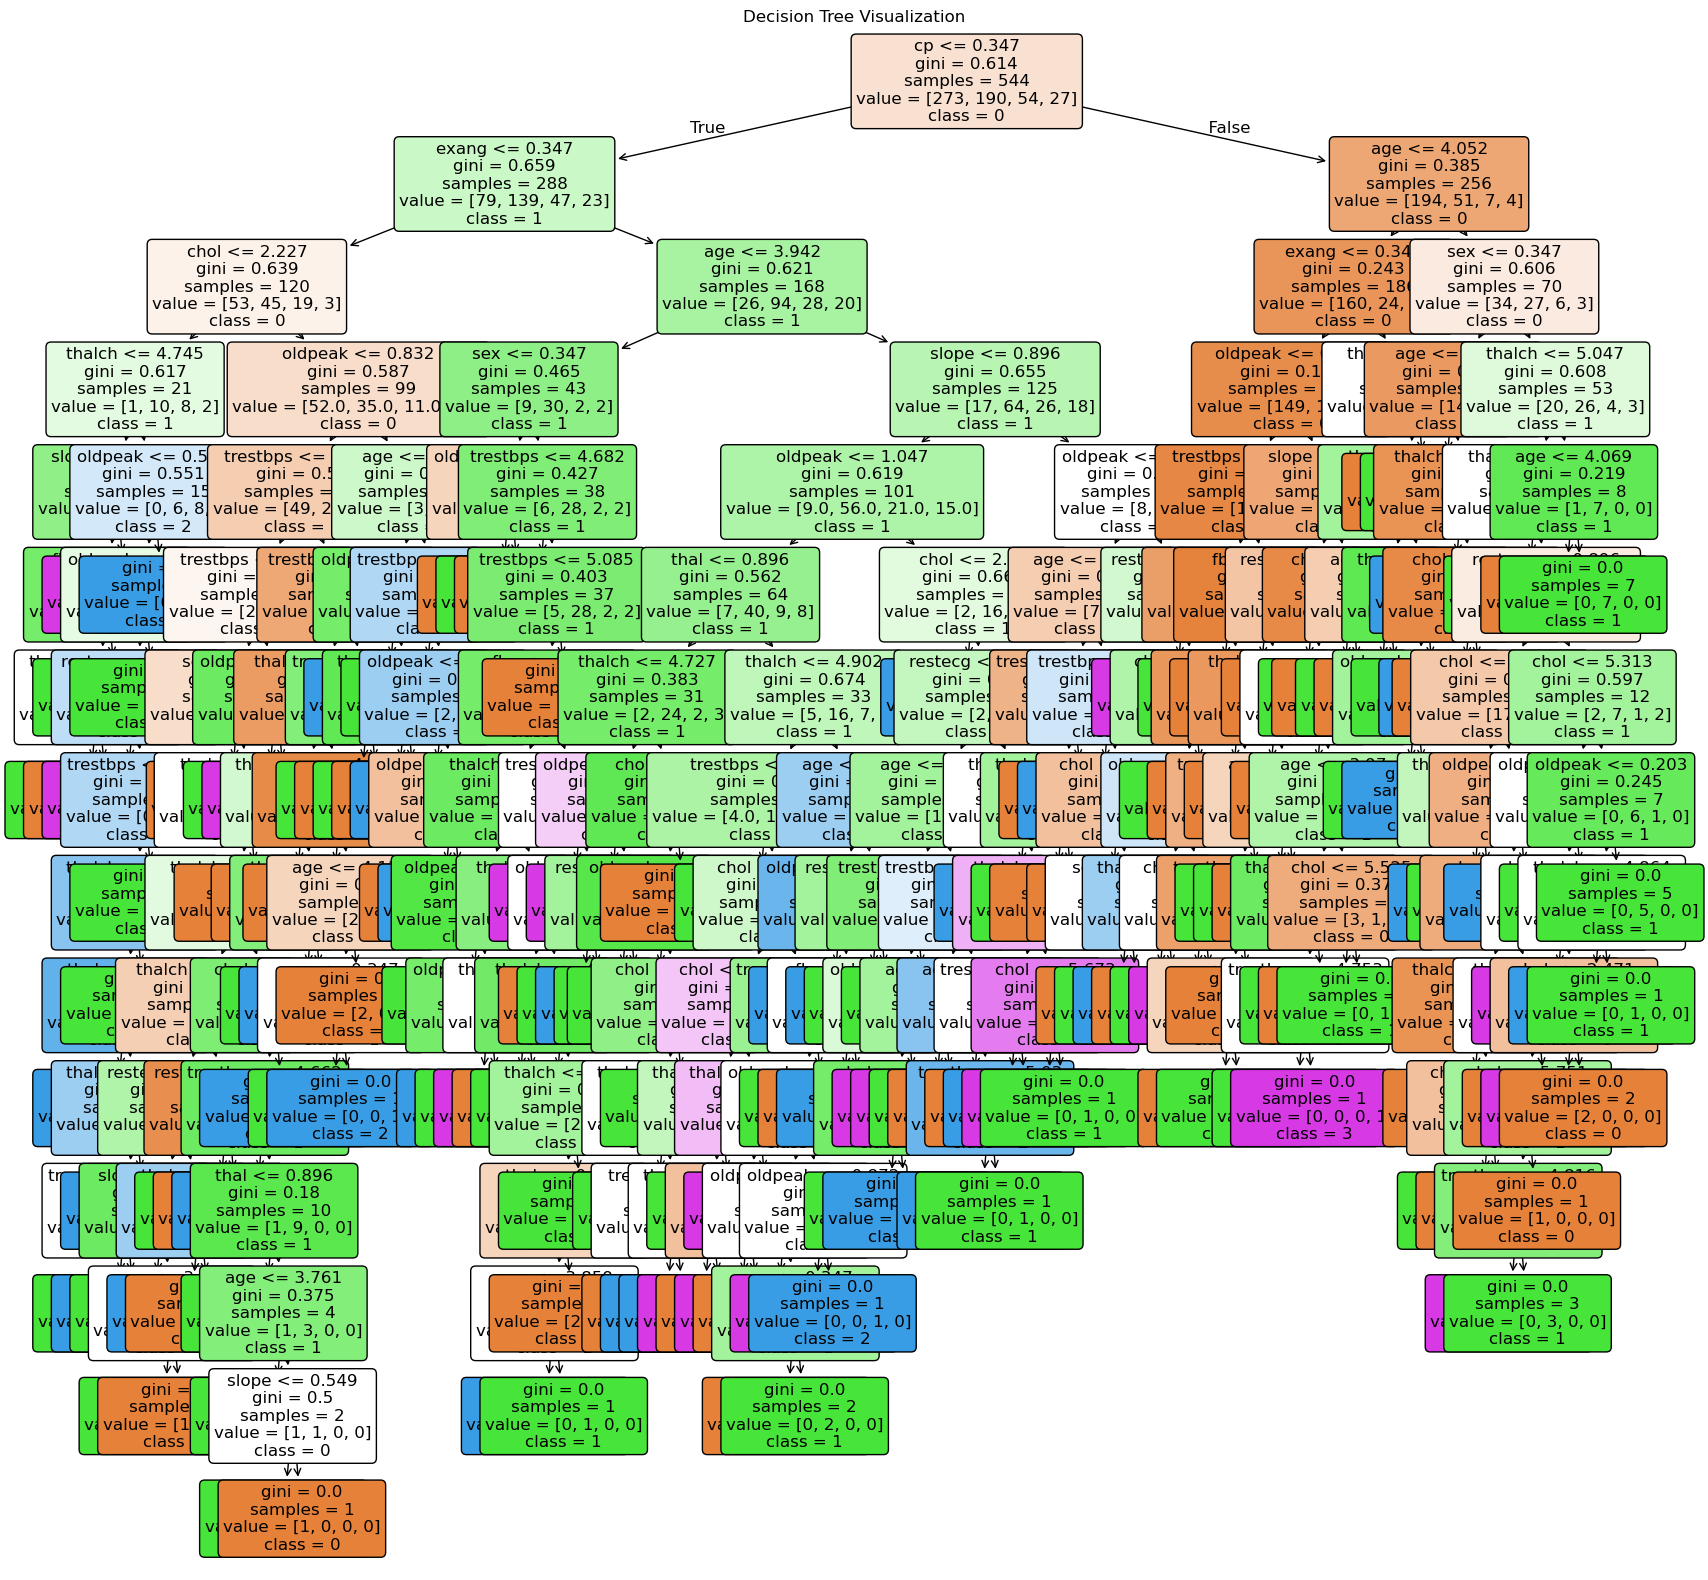

In [92]:
feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
class_names = ["0","1","2","3"]
# Plot the decision tree
plt.figure(figsize=(20, 20))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()
